In [2]:
import numpy as np
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt
import cv2
import cv2
import numpy as np

image = cv2.imread('img/soduku.jpg')

# Grayscale and Canny Edges extracted

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

cv2.imshow("edges", edges)
cv2.waitKey(0)
lines = cv2.HoughLines(edges, 1, np.pi/180, 210)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

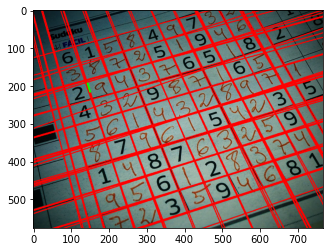

In [3]:
# Probabilstic Hough Lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, 5, 10)
for x1, y1, x2, y2 in lines[0]:
    cv2.line(image, (x1, y1), (x2, y2),(0, 255, 0), 3)
cv2.imshow("ho", image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

In [4]:
lines.shape

(378, 1, 4)

## Blob Detection

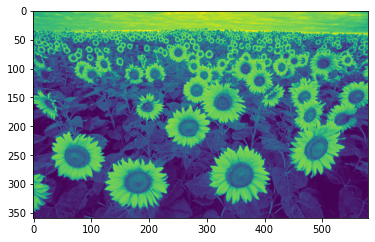

In [5]:
# Blob - pixels that share the common values
input = cv2.imread("img/Sunflowers.jpg", cv2.IMREAD_GRAYSCALE)
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(input)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(input, keypoints, blank, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("blob", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(input)

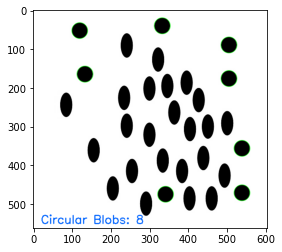

In [10]:
# Blob detection with Hyperparameters
image = cv2.imread("img/blobs.jpg", 0)
cv2.imshow('Original Image',image)
cv2.waitKey(0)

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)
cv2.imshow("Blobs using default parameters", blobs)
cv2.waitKey(0)

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = True 
params.minCircularity = 0.9
params.filterByConvexity = False
params.minConvexity = 0.2
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2.imshow("Filtering Circular Blobs Only", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(blobs)